## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
data = pd.read_csv("train_bank_churn.csv")
data.drop(columns=["Surname","CustomerId"],inplace=True)

In [3]:
data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,667,France,Male,33,5,0.0,2,1,1,145562.40,0
1,1,653,Germany,Female,34,1,152532.3,1,1,0,67972.45,0
2,2,656,France,Male,30,5,0.0,2,1,0,69052.87,0
3,3,704,France,Male,40,1,0.0,1,1,1,165561.82,0
4,4,642,France,Male,32,2,0.0,2,1,0,582.59,0


In [4]:
data.tail()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
13496,13496,589,Spain,Male,35,4,101993.12,1,1,0,143681.85,0
13497,13497,744,Spain,Male,34,8,0.00,1,1,1,10963.04,0
13498,13498,745,France,Female,36,9,0.00,1,0,1,63889.10,1
13499,13499,659,Spain,Male,37,9,130142.79,1,0,1,193502.93,0
13500,13500,622,France,Female,41,3,0.00,2,1,0,174431.01,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13501 non-null  int64  
 1   CreditScore      13501 non-null  int64  
 2   Geography        13501 non-null  object 
 3   Gender           13501 non-null  object 
 4   Age              13501 non-null  int64  
 5   Tenure           13501 non-null  int64  
 6   Balance          13501 non-null  float64
 7   NumOfProducts    13501 non-null  int64  
 8   HasCrCard        13501 non-null  int64  
 9   IsActiveMember   13501 non-null  int64  
 10  EstimatedSalary  13501 non-null  float64
 11  Exited           13501 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1.2+ MB


In [6]:
data.Exited.value_counts()

Exited
0    10810
1     2691
Name: count, dtype: int64

In [7]:
rows,col = data.shape
print(f"Rows: {rows} \nColumns: {col}")

Rows: 13501 
Columns: 12


## Checking Null Values

In [8]:
data.isnull().sum()

id                 0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Descriptive Statistics

In [9]:
data.describe(include="all").fillna("=")

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,13501.0,13501.0,13501,13501,13501.0,13501.0,13501.0,13501.0,13501.0,13501.0,13501.0,13501.0
unique,=,=,3,2,=,=,=,=,=,=,=,=
top,=,=,France,Male,=,=,=,=,=,=,=,=
freq,=,=,8106,7540,=,=,=,=,=,=,=,=
mean,6750.0,658.374195,=,=,37.708985,5.035997,43427.17468,1.585068,0.783349,0.493223,117408.724692,0.199319
std,3897.547327,73.14947,=,=,8.256677,2.800985,61690.274507,0.532468,0.411978,0.499973,45732.107253,0.399503
min,0.0,431.0,=,=,18.0,0.0,0.0,1.0,0.0,0.0,11.58,0.0
25%,3375.0,602.0,=,=,32.0,3.0,0.0,1.0,1.0,0.0,82969.61,0.0
50%,6750.0,661.0,=,=,37.0,5.0,0.0,2.0,1.0,0.0,122925.4,0.0
75%,10125.0,709.0,=,=,42.0,7.0,109988.06,2.0,1.0,1.0,156495.39,0.0


## Outliers Detection

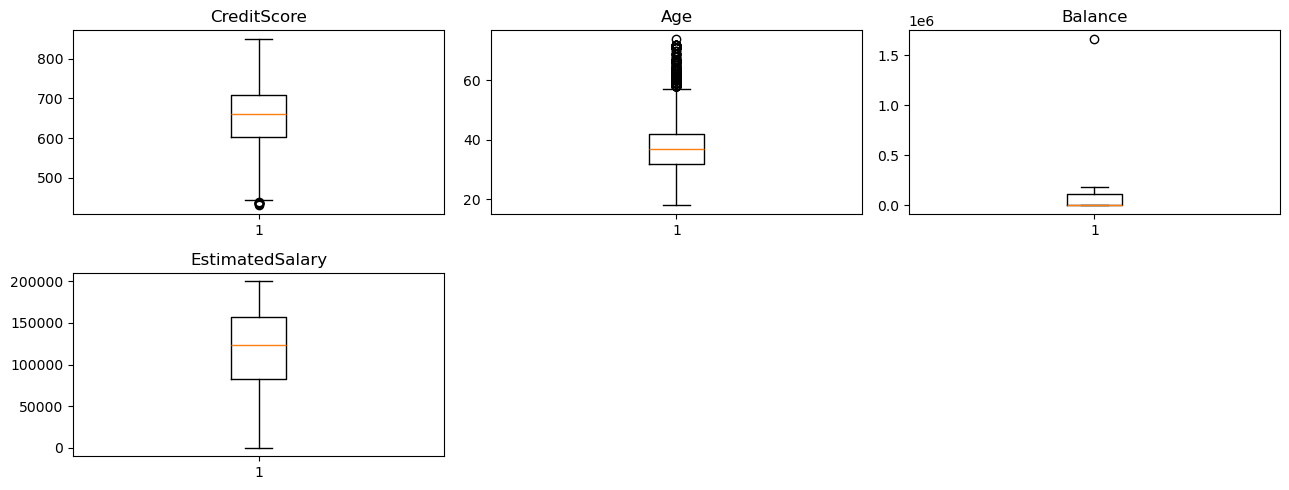

In [10]:
num_col = data[["CreditScore","Age","Balance","EstimatedSalary"]]
plt.figure(figsize=(13,5))

for i,j in enumerate(num_col.columns,1):
    plt.subplot(2,3,i)
    plt.boxplot(num_col[j])
    plt.title(j)

plt.tight_layout()
plt.show()
    
    

## Distribution of columns

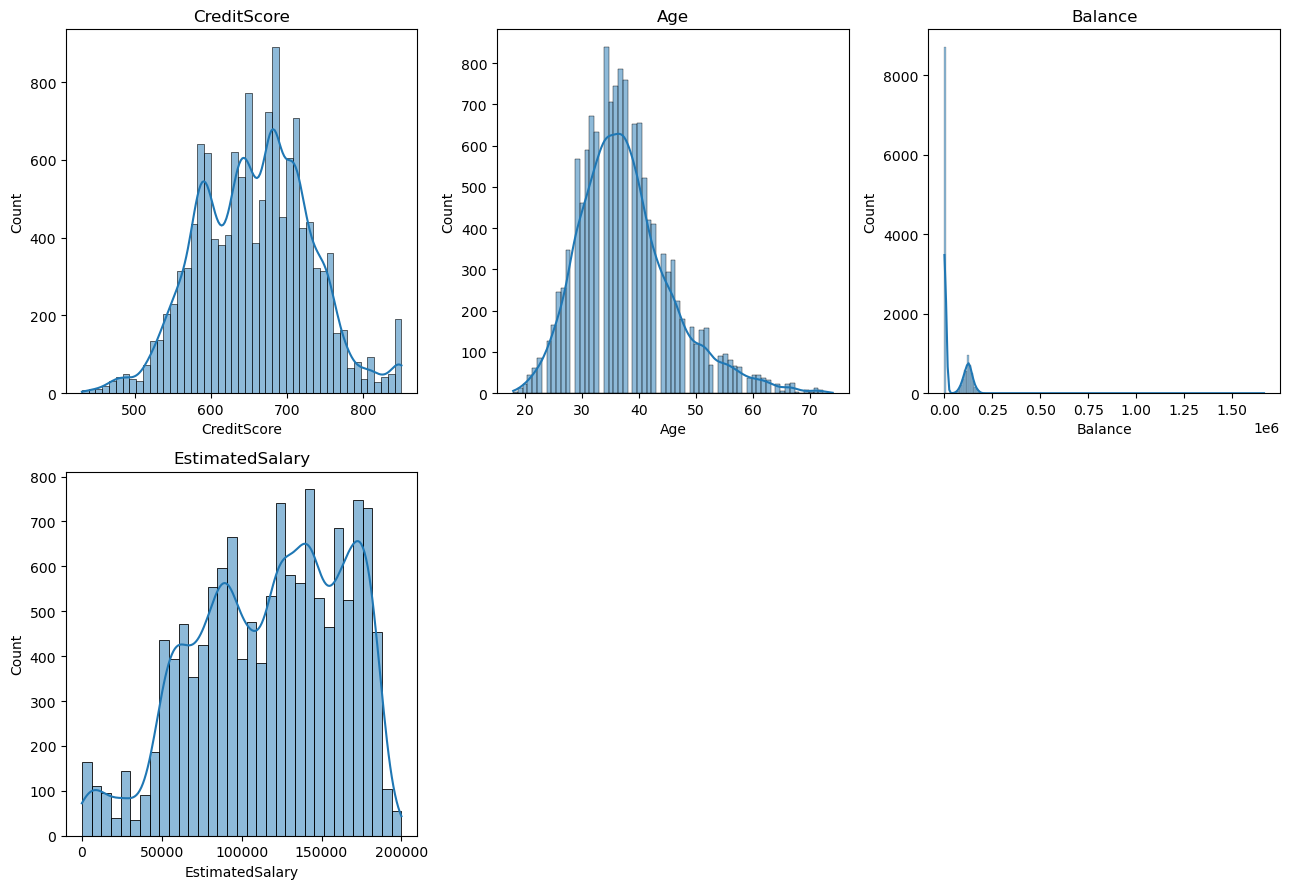

In [11]:
plt.figure(figsize=(13,9))

for i,j in enumerate(num_col.columns,1):
    plt.subplot(2,3,i)
    sns.histplot(num_col[j],kde=True)
    plt.title(j)

plt.tight_layout()
plt.show()
    
    

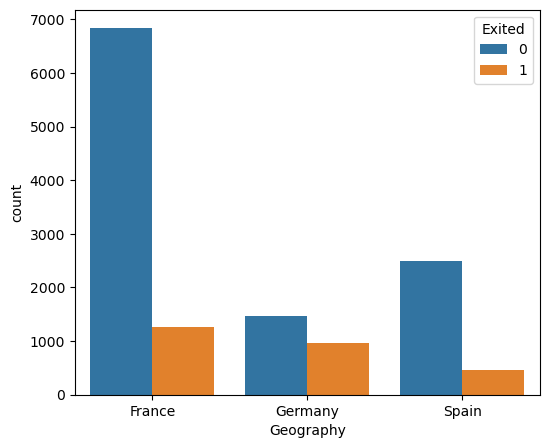

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()

## LabelEncoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data.Gender)  # male = 1 , female = 0

## OneHotEncoding

In [14]:
data = pd.get_dummies(data)

In [15]:
data.head()

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,667,1,33,5,0.0,2,1,1,145562.40,0,True,False,False
1,1,653,0,34,1,152532.3,1,1,0,67972.45,0,False,True,False
2,2,656,1,30,5,0.0,2,1,0,69052.87,0,True,False,False
3,3,704,1,40,1,0.0,1,1,1,165561.82,0,True,False,False
4,4,642,1,32,2,0.0,2,1,0,582.59,0,True,False,False


In [16]:
data.head()

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0,667,1,33,5,0.0,2,1,1,145562.40,0,True,False,False
1,1,653,0,34,1,152532.3,1,1,0,67972.45,0,False,True,False
2,2,656,1,30,5,0.0,2,1,0,69052.87,0,True,False,False
3,3,704,1,40,1,0.0,1,1,1,165561.82,0,True,False,False
4,4,642,1,32,2,0.0,2,1,0,582.59,0,True,False,False


## Base model

In [17]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

## Splitting data into Training and Testing Datasets

In [18]:
x,y = data.drop(columns=["Exited"]),data.Exited
x_trn,x_tst,y_trn,y_tst = train_test_split(x,y,test_size=.20,random_state=42)

## Checking correlation with target variable

In [19]:
x.corrwith(y).sort_values()

NumOfProducts       -0.289864
IsActiveMember      -0.176994
Gender              -0.174317
Geography_France    -0.131226
Geography_Spain     -0.060485
CreditScore         -0.036579
HasCrCard           -0.012149
Tenure              -0.002507
EstimatedSalary      0.012944
id                   0.015615
Balance              0.136957
Geography_Germany    0.231769
Age                  0.460338
dtype: float64

## Building Logistic Regression model

In [20]:
log = LogisticRegression()
log.fit(x_trn,y_trn)


LogisticRegression()

In [21]:
pred = log.predict(x_tst)
acc = accuracy_score(y_tst,pred)
acc

0.838578304331729

#### *Accuracy of base model is 84%*

## HyperParameter Tuning using GridSearch CV

In [22]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_trn,y_trn)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [23]:
log_grid= LogisticRegression(C=10, penalty="l1", solver="liblinear")

log_grid.fit(x_trn,y_trn)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [24]:
pred_grid = log_grid.predict(x_tst)
acc_grid = accuracy_score(y_tst,pred_grid)
acc_grid

0.8781932617549056

#### *Accuracy of model using GridSearchCV is 87.8%*

## HyperParameter Tuning using RandomizedSearchCV

In [25]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
random_search = RandomizedSearchCV(log, param_distributions=param_grid, cv=5, scoring='accuracy')
random_search.fit(x_trn,y_trn)
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [26]:
log_random= LogisticRegression(C=10, penalty="l1", solver="liblinear")

log_random.fit(x_trn,y_trn)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [27]:
pred_random = log_random.predict(x_tst)
acc_random = accuracy_score(y_tst,pred_random)
acc_random

0.8781932617549056

#### *Accuracy of model using RandomizedSearchCV  is 87.93%*

## Using Standartization and Polynomial Features

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_trn)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

log1 = LogisticRegression()

log1.fit(X_poly, y_trn)

X_tst_scaled = scaler.transform(x_tst)
X_tst_poly = poly.transform(X_tst_scaled)

y_pred = log1.predict(X_tst_poly)


accuracy = accuracy_score(y_tst, y_pred)
print(f'Accuracy of Logistic Regression with Polynomial Features: {accuracy}')


Accuracy of Logistic Regression with Polynomial Features: 0.8952239911144021


#### *Accuracy of model using StandardScaler and  PolynomialFeatures accuracy is 89%*